<a href="https://colab.research.google.com/github/Ghadeer98/ML-project/blob/main/Final_edited_code_(Diamond_compition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'> Diamond dataset </font>

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content price price in US dollars ($326--$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
dataset= pd.read_csv("/content/drive/MyDrive/Classroom/Shai training 2023 G3/diamond_train.csv")

In [102]:
dataset.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [104]:
dataset.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [105]:
dataset.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

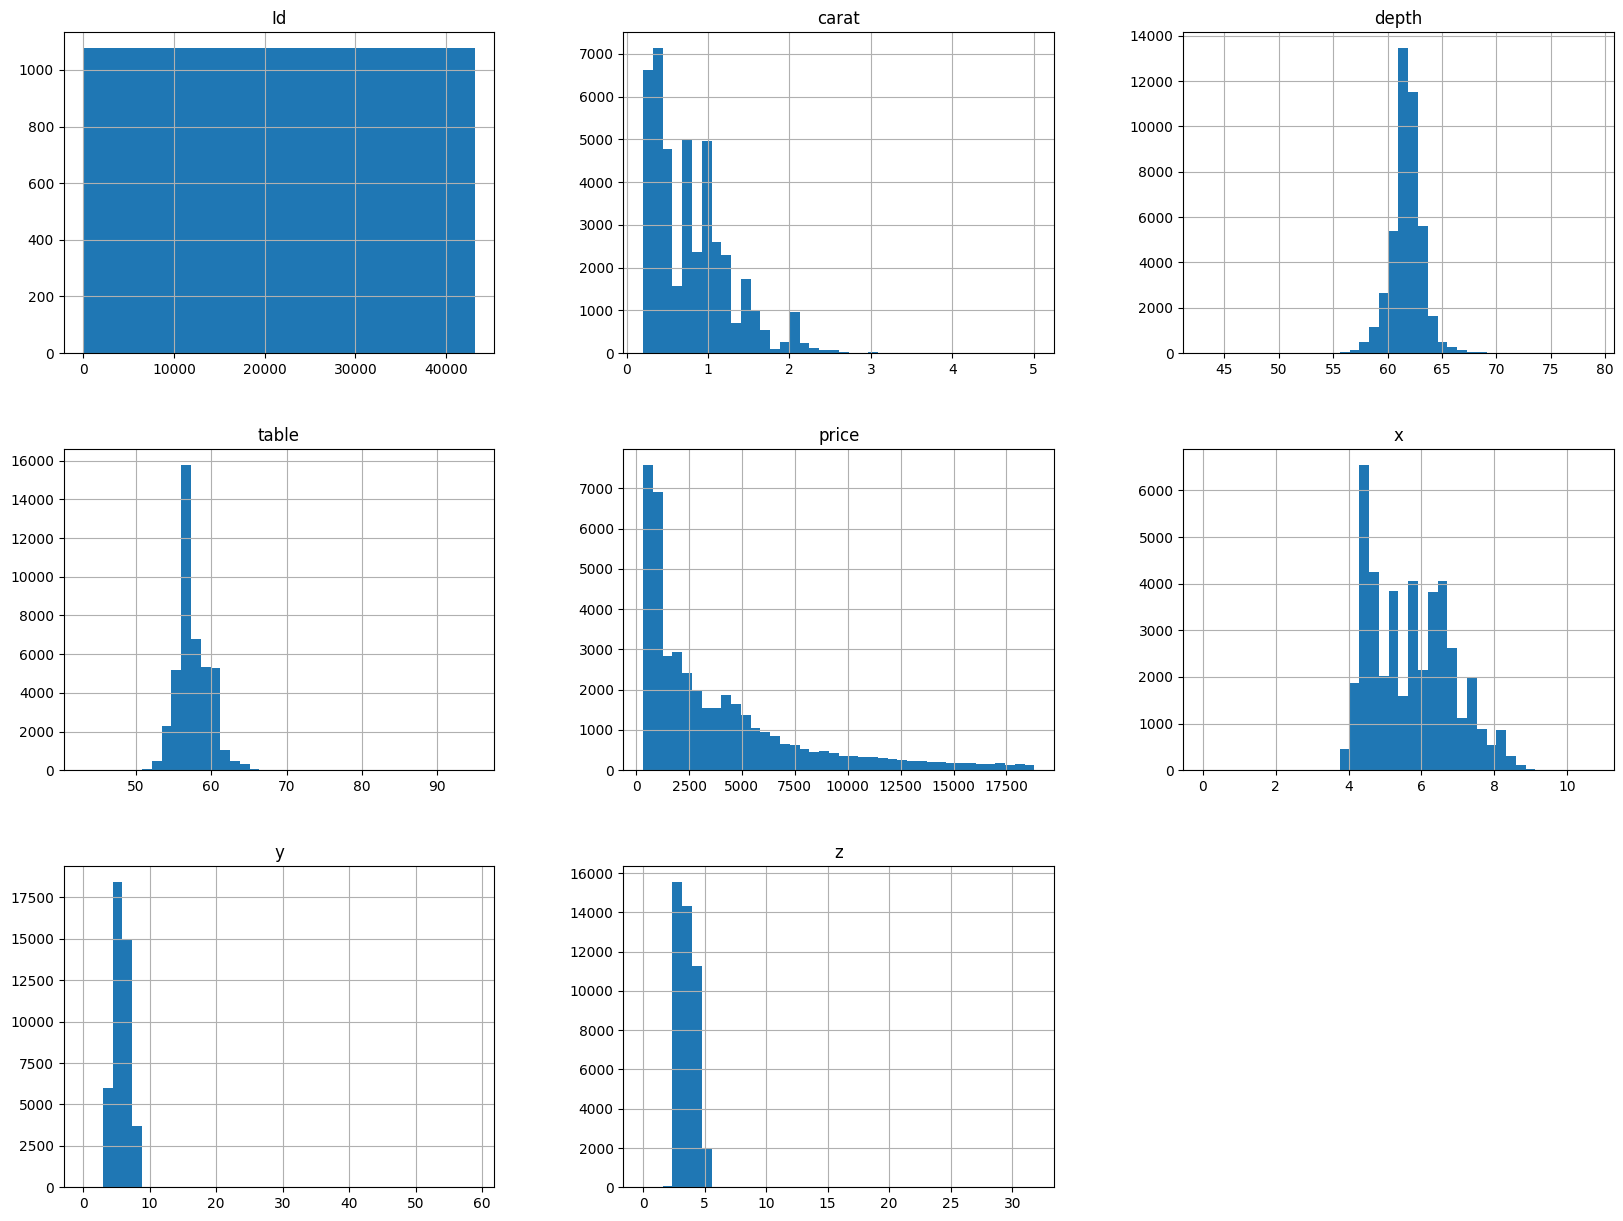

In [106]:
dataset.hist(bins=40,figsize=(20,15))
plt.show()

In [107]:
cut_quality=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'] # from worst to best

In [108]:
dataset['cut'].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

<Axes: xlabel='cut', ylabel='price'>

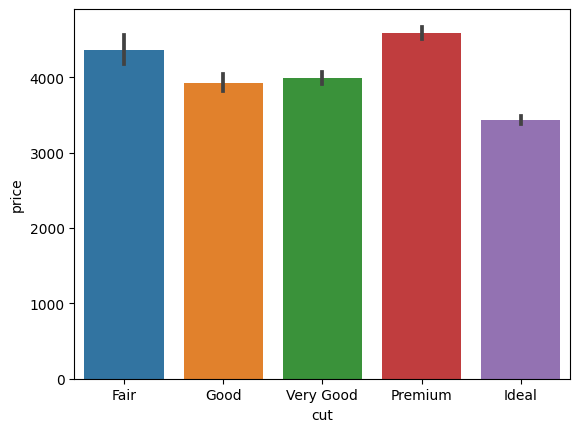

In [109]:
sns.barplot(x='cut', y='price', data=dataset,order=cut_quality)

<Axes: xlabel='cut', ylabel='price'>

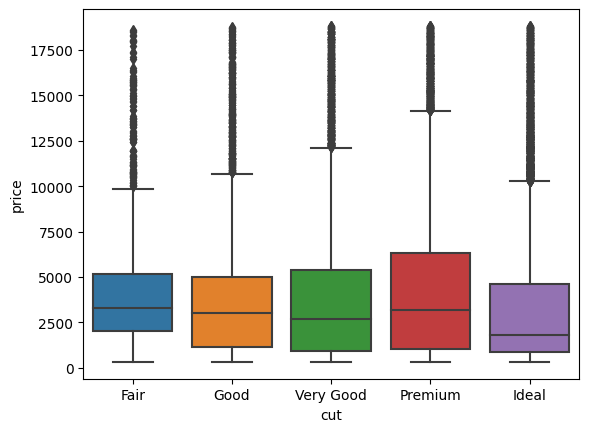

In [110]:
sns.boxplot(x='cut', y='price', data=dataset, order=cut_quality)

In [111]:
color_quality=['J','I','H','G','F','E','D'] # from worst to best 

In [112]:
dataset['color'].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

<Axes: xlabel='color', ylabel='price'>

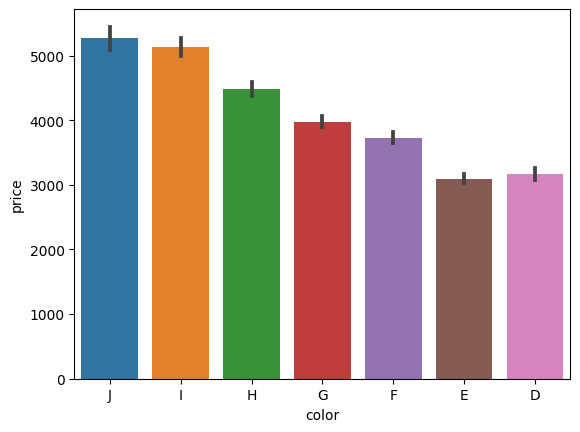

In [113]:
sns.barplot(x='color', y='price', data=dataset, order=color_quality)

<Axes: xlabel='color', ylabel='price'>

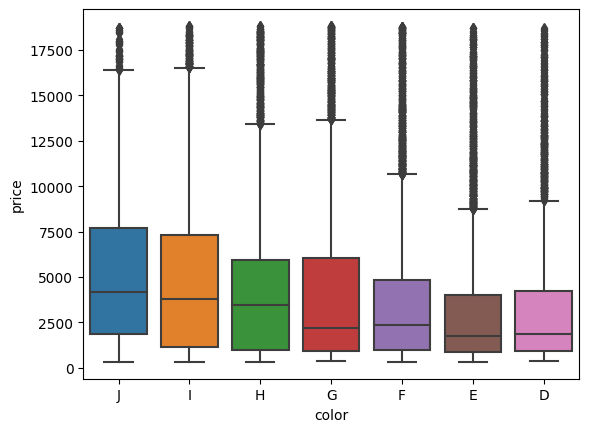

In [114]:
sns.boxplot(x='color', y='price', data=dataset, order=color_quality)

In [115]:
clarity_order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'] # from worst to best

In [116]:
dataset['clarity'].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

<Axes: xlabel='clarity', ylabel='price'>

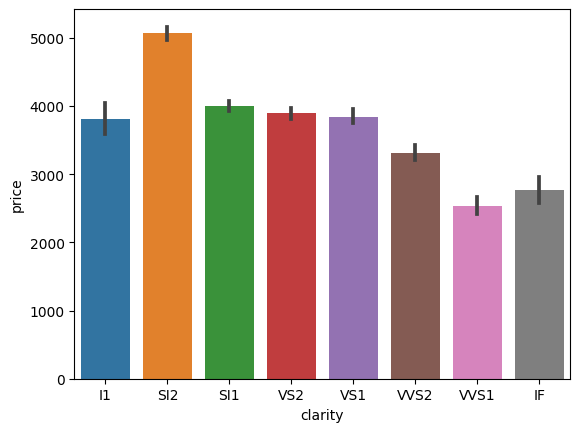

In [117]:
sns.barplot(x='clarity', y='price', data=dataset, order= clarity_order)

<Axes: xlabel='clarity', ylabel='price'>

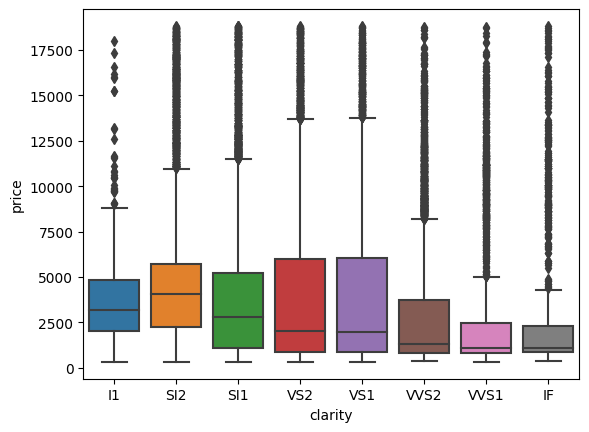

In [118]:
sns.boxplot(x='clarity', y='price', data=dataset, order=clarity_order)

<Axes: xlabel='carat', ylabel='price'>

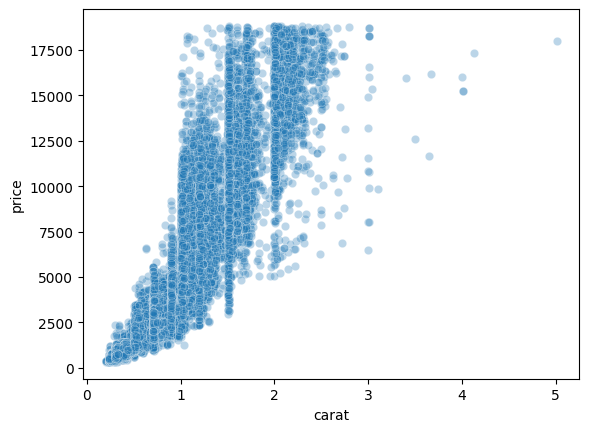

In [119]:
sns.scatterplot(x='carat', y='price', data=dataset, alpha=0.3)

In [120]:
# Further modification on data by droping out the visually detected outliers in terms of carat
dataset=dataset[ (dataset['carat'] <3.0) ]

In [121]:
dataset.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            43142, 43143, 43144, 43145, 43146, 43147, 43148, 43149, 43150,
            43151],
           dtype='int64', length=43125)

<Axes: xlabel='carat', ylabel='price'>

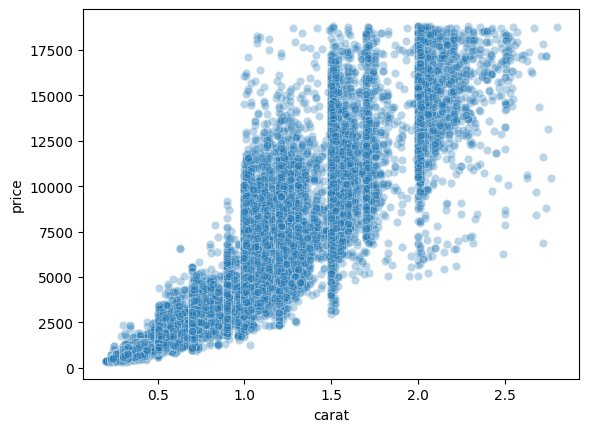

In [122]:
sns.scatterplot(x='carat', y='price', data=dataset, alpha=0.3)

In [123]:
num_cols=['carat','price','depth','table','x','y','z']

In [124]:
for col in num_cols:
    #calculating Q1 for the feature
    q1 = dataset[col].quantile(0.25)
    #calculating Q3 for the feature
    q3 = dataset[col].quantile(0.75)
    
    #Calculating the IQR value
    iqr = q3-q1
    # Calculating min/max value based on IQR
    minn = q1-1.5*iqr
    maxx = q3+1.5*iqr
    
    # Filtering values only in the min-max range
    dataset = dataset[(dataset[col] >= minn) & (dataset[col] <= maxx)]
    
#     print(col,q25-1.5*mean,q25,mean,q75,q75+1.5*mean)

In [125]:
dataset=dataset.reset_index().drop(['index'], axis=1)
dataset

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
2,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
3,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
4,6,0.90,Very Good,G,IF,63.1,58.0,5670,6.18,6.09,3.87
...,...,...,...,...,...,...,...,...,...,...,...
37177,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
37178,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
37179,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
37180,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


<Axes: >

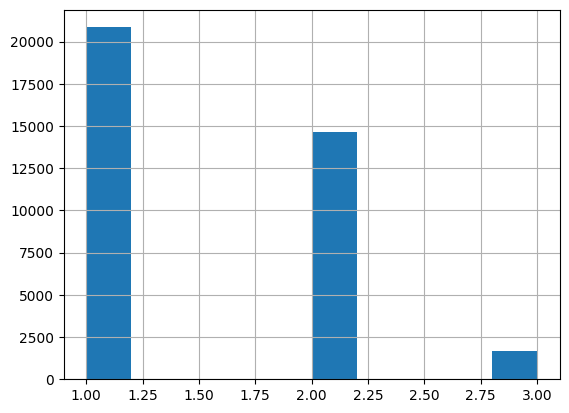

In [126]:
dataset["carat_categories"] = pd.cut(dataset["carat"], bins=[0., 0.7, 1.4, np.inf], labels=[1, 2, 3])

dataset["carat_categories"].hist()

In [127]:
dataset.head(3)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,carat_categories
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,2
1,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,1
2,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,1


In [128]:
dataset["carat_categories"].value_counts() / len(dataset)

1    0.560755
2    0.393739
3    0.045506
Name: carat_categories, dtype: float64

Spliting traing and testing sets

In [129]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["carat_categories"]):
  strat_train_set = dataset.loc[train_index]
  strat_test_set = dataset.loc[test_index]


In [130]:
strat_test_set["carat_categories"].value_counts() / len(strat_test_set)

1    0.560710
2    0.393707
3    0.045583
Name: carat_categories, dtype: float64

In [131]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("carat_categories", axis=1, inplace=True)

In [132]:
diamond_train = strat_train_set.copy()

In [133]:
matrix = diamond_train.corr()
matrix["price"].sort_values(ascending=False)

<ipython-input-133-1fe13050760c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = diamond_train.corr()


price    1.000000
carat    0.925256
y        0.905325
x        0.904362
z        0.901636
table    0.134952
depth    0.017113
Id       0.001580
Name: price, dtype: float64

In [134]:
diamond_train = strat_train_set.drop("price", axis=1)
diamond_train= diamond_train.set_index('Id')
diamond_train_labels = strat_train_set["price"].copy()

In [135]:
diamond_train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [136]:
diamond_train.duplicated().sum()

117

In [137]:
#diamond_train.

In [138]:
# diamond_train.iloc[39310]

In [139]:
# duplicated_rows = diamond_train.duplicated(keep='first')  # Keep the first occurrence

# # Get the index of the duplicated rows
# duplicated_rows_index = diamond_train[duplicated_rows].index

# # Drop the corresponding rows from df2
# df2_dropped = diamond_train_labels.drop(duplicated_rows_index)

# # Print the resulting DataFrame
# print(df2_dropped)

In [140]:
# duplicated_rows = diamond_train.duplicated(keep='first')
# duplicated_rows_index = diamond_train[duplicated_rows].index
# diamond_train_labels=diamond_train_labels.drop(duplicated_rows_index)
# diamond_train.drop_duplicates(inplace=True)

In [141]:
diamond_train.duplicated().sum()

117

In [142]:
diamond_train.shape

(29745, 9)

In [143]:
diamond_train_labels.shape

(29745,)

In [144]:
diamond_train.replace(0, np.nan, inplace=True)
#diamond_train=diamond_train.reset_index()

In [145]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
diamond_train_num = diamond_train.drop(['cut','color','clarity'], axis=1)
imputer.fit(diamond_train_num)

SimpleImputer(strategy='median')

In [146]:
imputer.statistics_

array([ 0.59, 61.9 , 57.  ,  5.39,  5.4 ,  3.32])

In [147]:
diamond_train_num.median().values

array([ 0.59, 61.9 , 57.  ,  5.39,  5.4 ,  3.32])

In [148]:
X = imputer.transform(diamond_train_num)

In [149]:
diamond_tr = pd.DataFrame(X, columns=diamond_train_num.columns)

# Handling Text and Categorical Attributes

In [150]:
diamond_train_cat = diamond_train[["cut", "color","clarity"]]
diamond_train_cat.head(5)

,cut,color,clarity
Id,,,
1486,Ideal,I,VS2
24456,Ideal,G,VVS2
6267,Premium,G,VS2
15360,Premium,H,VS1
29391,Ideal,H,I1


In [151]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[cut_quality,color_quality,clarity_order])

In [152]:
diamond_cat_encoded = ordinal_encoder.fit_transform(diamond_train_cat)
diamond_cat_encoded[:5]

array([[4., 1., 3.],
       [4., 3., 5.],
       [3., 3., 3.],
       [3., 2., 4.],
       [4., 2., 0.]])

In [153]:
ordinal_encoder.categories_

[array(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype=object),
 array(['J', 'I', 'H', 'G', 'F', 'E', 'D'], dtype=object),
 array(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
       dtype=object)]

Adding new feature 

In [154]:
from sklearn.base import BaseEstimator, TransformerMixin
class MultiplyXYZAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, x_attribute_index=-3, y_attribute_index=-2, z_attribute_index=-1):
        self.x_attribute_index = x_attribute_index
        self.y_attribute_index = y_attribute_index
        self.z_attribute_index = z_attribute_index

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        x_attribute = X[:, self.x_attribute_index].reshape(-1, 1)
        y_attribute = X[:, self.y_attribute_index].reshape(-1, 1)
        z_attribute = X[:, self.z_attribute_index].reshape(-1, 1)
        size = x_attribute * y_attribute * z_attribute
        X = np.delete(X, [self.x_attribute_index, self.y_attribute_index, self.z_attribute_index], axis=1)
        X = np.hstack([X, size])
        return X

attr_adder = MultiplyXYZAttributesAdder(x_attribute_index=-3, y_attribute_index=-2, z_attribute_index=-1)
diamond_extra_attribs = attr_adder.transform(diamond_train.values)


In [155]:
diamond_extra_attribs

array([[0.63, 'Ideal', 'I', ..., 62.1, 54.0, 104.702122],
       [1.1, 'Ideal', 'G', ..., 61.0, 56.0, 184.14693300000002],
       [0.3, 'Premium', 'G', ..., 61.8, 60.0, 48.13380000000001],
       ...,
       [0.38, 'Premium', 'E', ..., 62.2, 59.0, 62.487869],
       [0.5, 'Very Good', 'F', ..., 59.4, 59.0, 83.713662],
       [0.56, 'Ideal', 'E', ..., 61.9, 55.0, 92.937894]], dtype=object)

In [156]:
diamond_extra_attribs[:, -1]

array([104.702122, 184.14693300000002, 48.13380000000001, ..., 62.487869,
       83.713662, 92.937894], dtype=object)

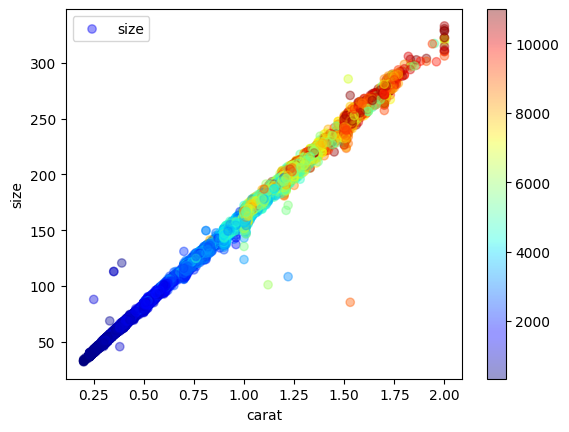

In [157]:
carat = diamond_extra_attribs[:, 0] # extract the first column in as carat
size = diamond_extra_attribs[:, -1] # extract the last column in as size

plt.scatter(carat, size, alpha=0.4, c=diamond_train_labels, cmap=plt.get_cmap("jet"), label="size")
plt.colorbar()
plt.xlabel("carat")
plt.ylabel("size")
plt.legend()
plt.show()

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', MultiplyXYZAttributesAdder(x_attribute_index=-3, y_attribute_index=-2, z_attribute_index=-1)),
 ('std_scaler', StandardScaler()),
 ])
diamond_num_tr = num_pipeline.fit_transform(diamond_train_num)


In [159]:
from sklearn.compose import ColumnTransformer
num_attribs = diamond_train.select_dtypes(exclude="object").columns
cat_attribs = diamond_train.select_dtypes(include="object").columns
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OrdinalEncoder(categories=[cut_quality,color_quality,clarity_order]), cat_attribs),
 ])
diamond_prepared = full_pipeline.fit_transform(diamond_train)

# Select and Train a Model


Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(diamond_prepared, diamond_train_labels)

LinearRegression()

In [161]:
some_data = diamond_train.iloc[:5]
some_labels = diamond_train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [2015.3540939  6784.41781322 -194.52692031  209.0289813  3867.06143597]


In [162]:
print("Labels:", list(some_labels))

Labels: [1423, 9856, 630, 743, 3136]


In [163]:
from sklearn.metrics import mean_squared_error
diamond_predictions = lin_reg.predict(diamond_prepared)
lin_mse = mean_squared_error(diamond_train_labels, diamond_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

764.2428922094939

Cross validation

In [164]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [165]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, diamond_prepared, diamond_train_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [764.10474235 753.23844587 772.05984699 761.71619392 758.23259167
 789.26436601 749.60305457 767.99526594 750.04888467 778.85239584]
Mean: 764.5115787833901
Standard deviation: 12.220451918679881


Decision Tree Regressor

In [166]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(diamond_prepared, diamond_train_labels)

DecisionTreeRegressor()

In [167]:
some_data = diamond_train.iloc[:5]
some_labels = diamond_train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", tree_reg.predict(some_data_prepared))

Predictions: [1423. 9856.  630.  743. 3108.]


In [168]:
print("Labels:", list(some_labels))

Labels: [1423, 9856, 630, 743, 3136]


In [169]:
from sklearn.metrics import mean_squared_error
diamond_predictions = tree_reg.predict(diamond_prepared)
tree_mse = mean_squared_error(diamond_train_labels, diamond_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

31.122087550507096

Cross validation

In [170]:
scores = cross_val_score(tree_reg, diamond_prepared, diamond_train_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [171]:
display_scores(tree_rmse_scores)

Scores: [485.14059555 475.29538706 454.99684024 467.84227334 486.70828544
 474.79567162 467.91374723 482.04090761 463.06788324 476.36540784]
Mean: 473.4166999172818
Standard deviation: 9.54130387556361


Random Forest Regressor

In [172]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(diamond_prepared, diamond_train_labels)

RandomForestRegressor()

In [173]:
some_data = diamond_train.iloc[:5]
some_labels = diamond_train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", forest_reg.predict(some_data_prepared))

Predictions: [1480.33       9538.71        644.04666667  715.208      3120.80533333]


In [174]:
print("Labels:", list(some_labels))

Labels: [1423, 9856, 630, 743, 3136]


In [175]:
from sklearn.metrics import mean_squared_error
diamond_predictions = forest_reg.predict(diamond_prepared)
forest_mse = mean_squared_error(diamond_train_labels, diamond_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

132.64457969394067

Cross valiation

In [176]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, diamond_prepared, diamond_train_labels,
 scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [177]:
display_scores(forest_rmse_scores)

Scores: [345.26274542 365.30519924 338.40963773 354.25110455 356.08720487
 337.59423259 344.19077705 361.86910515 355.4422525  354.9776319 ]
Mean: 351.33898909952575
Standard deviation: 9.006358654052075


GradientBoostingRegressor

In [178]:
from sklearn.ensemble import GradientBoostingRegressor
boost_reg = GradientBoostingRegressor()
boost_reg.fit(diamond_prepared, diamond_train_labels)

GradientBoostingRegressor()

In [179]:
some_data = diamond_train.iloc[:5]
some_labels = diamond_train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", boost_reg.predict(some_data_prepared))

Predictions: [1942.69436378 8938.87145276  664.19011626  646.14409842 3214.80561082]


In [180]:
print("Labels:", list(some_labels))

Labels: [1423, 9856, 630, 743, 3136]


In [181]:
from sklearn.metrics import mean_squared_error
diamond_predictions = boost_reg.predict(diamond_prepared)
boost_mse = mean_squared_error(diamond_train_labels, diamond_predictions)
boost_rmse = np.sqrt(boost_mse)
boost_rmse

373.84285806943484

Cross validation

In [182]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(boost_reg, diamond_prepared, diamond_train_labels,
 scoring="neg_mean_squared_error", cv=10)
boost_rmse_scores = np.sqrt(-scores)

In [183]:
display_scores(boost_rmse_scores)

Scores: [374.04642166 387.50493878 378.47372788 382.38081019 394.61997958
 374.43139151 384.52842153 399.99674918 387.24503357 381.3902191 ]
Mean: 384.4617692989848
Standard deviation: 7.875570552812819


Find best hyperparaqmeter combination when using forest regression

In [184]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [70, 100, 140],
    'max_depth': [6, 7, 8],
}

boost_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(diamond_prepared, diamond_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8],
                         'n_estimators': [70, 100, 140]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [185]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [186]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8)

In [187]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

492.9408716393054 {'max_depth': 6, 'n_estimators': 70}
491.74747082603193 {'max_depth': 6, 'n_estimators': 100}
493.2442123377048 {'max_depth': 6, 'n_estimators': 140}
437.94617232161244 {'max_depth': 7, 'n_estimators': 70}
438.1971621718478 {'max_depth': 7, 'n_estimators': 100}
437.56812737614547 {'max_depth': 7, 'n_estimators': 140}
396.71640924876283 {'max_depth': 8, 'n_estimators': 70}
396.2804526482223 {'max_depth': 8, 'n_estimators': 100}
396.44124096889766 {'max_depth': 8, 'n_estimators': 140}


Testing the model

In [188]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [189]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([383.23477238, 429.09397526])

Testing on the csv

In [190]:
test_dataset= pd.read_csv("/content/drive/MyDrive/Classroom/Shai training 2023 G3/diamond_test.csv")

In [191]:
test_dataset.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [192]:
Id=test_dataset['Id']

In [193]:
test_dataset= test_dataset.set_index('Id')

In [194]:
num_attribs = test_dataset.select_dtypes(exclude="object").columns
cat_attribs = test_dataset.select_dtypes(include="object").columns
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OrdinalEncoder(categories=[cut_quality,color_quality,clarity_order]), cat_attribs),
 ])
final_test_prepared = full_pipeline.fit_transform(test_dataset)

In [195]:
final_model = grid_search.best_estimator_

In [196]:
PredictionsToSubmission = final_model.predict(final_test_prepared)

In [197]:
data={'Id': Id, 'price':PredictionsToSubmission }
sub = pd.DataFrame(data=data)

In [198]:
sub.to_csv('submission.csv',index=False)